<a href="https://colab.research.google.com/github/vanechev/clusteranalysis/blob/main/Clustering_evaluation_with_question_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

from https://analyticsindiamag.com/a-tutorial-on-various-clustering-evaluation-metrics/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sns.set_theme()
sns.set_palette("Set2")

## **Reading & pre-processing data set**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/vis-literacy/dataset_survey.csv')
df.head()

,Start Date,End Date,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient First Name,Recipient Email,...,V3-Q3 correct,average time answering the questions,Raw score,weighted score,V1 score,V1 avg timing,V2 score,V2 avg timing,V3 score,V3 avg timing
0,29/8/2022 13:37,29/8/2022 14:13,118.138.122.192,100.0,2185.0,True,29/8/2022 14:13,R_3L51AYcJRxEVfgP,Francisca Antolis,fant0001@student.monash.edu,...,1.0,12.760143,6.0,11.0,3.0,15.211667,1.0,9.594000,2.0,11.364000
1,2/9/2022 10:41,2/9/2022 11:12,49.184.16.33,100.0,1846.0,True,2/9/2022 11:12,R_1itcssXxxXfDQfB,Emilie D'Souza,edso0003@student.monash.edu,...,1.0,14.011222,8.0,15.0,3.0,9.402667,2.0,14.059333,3.0,18.571667
2,13/9/2022 10:56,13/9/2022 11:28,123.3.233.241,100.0,1928.0,True,13/9/2022 11:28,R_eOF6qLhhBykiKHL,Georgia Elkins,georgiaelkins@icloud.com,...,1.0,14.170444,8.0,15.0,3.0,14.277000,2.0,11.713000,3.0,16.521333
3,1/9/2022 17:21,5/9/2022 22:36,203.129.49.31,100.0,364524.0,True,5/9/2022 22:36,R_3Rqo9roBv5poQxL,Rebecca Dach,rdac0002@student.monash.edu,...,1.0,14.203889,9.0,17.0,3.0,12.081667,3.0,19.195333,3.0,11.334667
4,9/9/2022 8:01,9/9/2022 8:47,121.200.5.6,100.0,2750.0,True,9/9/2022 8:47,R_3Dd49u0SpsBXLsw,James Imbuido,jimb0001@student.monash.edu,...,0.0,16.090333,5.0,8.0,2.0,7.125667,3.0,21.739667,0.0,19.405667


In [ ]:
# df.info()

In [ ]:
X = df[["V1 score", "V1 avg timing", "V2 score", "V2 avg timing", "V3 score", "V3 avg timing", "Raw score"]]
X.head()

,V1 score,V1 avg timing,V2 score,V2 avg timing,V3 score,V3 avg timing,Raw score
0,3.0,15.211667,1.0,9.594000,2.0,11.364000,6.0
1,3.0,9.402667,2.0,14.059333,3.0,18.571667,8.0
2,3.0,14.277000,2.0,11.713000,3.0,16.521333,8.0
3,3.0,12.081667,3.0,19.195333,3.0,11.334667,9.0
4,2.0,7.125667,3.0,21.739667,0.0,19.405667,5.0


Checking percentage of missing values

In [ ]:
X.isnull().sum()/len(df)*100

V1 score         6.0
V1 avg timing    6.0
V2 score         6.0
V2 avg timing    6.0
V3 score         6.0
V3 avg timing    6.0
Raw score        6.0
dtype: float64

In [ ]:
# X.dropna(inplace=True)
#X = X_normalized
#X.head()

# **Part 1: Students overall interpretation of the visualisations**

### **Pre-processing**

In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/Datasets/score_time_per_vis.csv')
df2["vis"] = df2["vis"].replace(1,"net graph")
df2["vis"] = df2["vis"].replace(2,"bar graph")
df2["vis"] = df2["vis"].replace(3,"hive")
df2.head()

,n,score,timing,vis
0,1,2,7.125667,net graph
1,2,2,21.271333,net graph
2,3,3,15.211667,net graph
3,4,1,16.193000,net graph
4,5,3,15.132000,net graph


In [ ]:
#sns.barplot(data=df2, x="vis", y="timing")

In [ ]:
#sns.barplot(data=df2, x="vis", y="score")

### **Visual exploration**

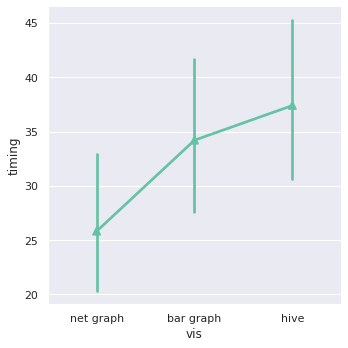

In [ ]:
sns.catplot(
    data=df2, x="vis", y="timing",
    markers=["^", "o", "x"], linestyles=["-", "--", "."],
    kind="point"
)

Time completion per visualisation


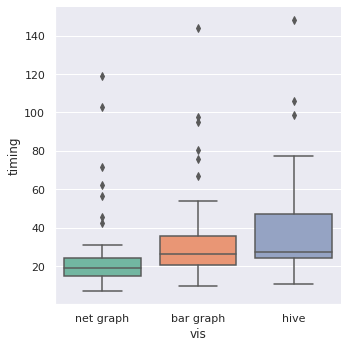

In [ ]:
print("Time completion per visualisation")
sns.catplot(data=df2, x="vis", y="timing", kind="box")

Depending on the visualisation, the timing for completion increased.

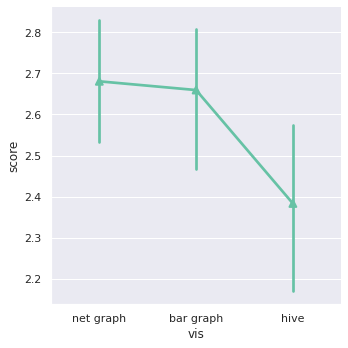

In [ ]:
sns.catplot(
    data=df2, x="vis", y="score",
    markers=["^", "o", "x"], linestyles=["-", "--", "."],
    kind="point"
)

Depending on the visualisation, the scores decreased.

Score distribution per visualisation


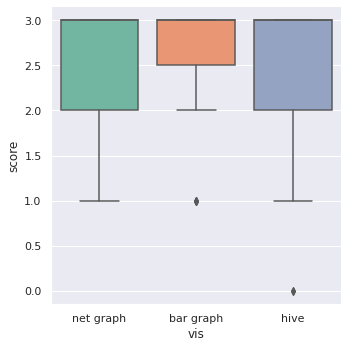

In [ ]:
print("Score distribution per visualisation")
sns.catplot(data=df2, x="vis", y="score", kind="box")

In [ ]:
numerical = ['V1 avg timing', 'V2 avg timing', 'V3 avg timing']
categorical = ['V1 score', 'V2 score', 'V3 score', 'Raw score']

Distribution of scores per Visualisation


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

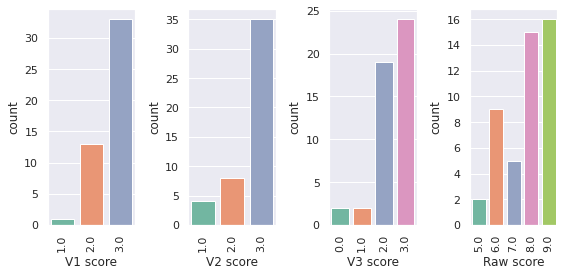

In [ ]:
print("Distribution of scores per Visualisation")
fig, ax = plt.subplots(1, 4, figsize=(8, 4))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(X[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

fig.tight_layout()

In [ ]:
#print("Histogram of time completion per Visualisation")
#df_X[numerical].hist(bins=5, figsize=(15, 6), layout=(2, 4));

### **Descriptive Statistics**

In [ ]:
print("Descriptive Statistics")
X.describe()

Descriptive Statistics


,V1 score,V1 avg timing,V2 score,V2 avg timing,V3 score,V3 avg timing,Raw score
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,2.680851,25.811837,2.659574,34.199273,2.382979,37.394433,7.723404
std,0.515262,22.606116,0.635083,26.246849,0.767639,26.253664,1.245900
min,1.000000,7.125667,1.000000,9.594000,0.000000,10.840000,5.000000
25%,2.000000,14.758000,2.500000,20.617000,2.000000,24.096500,7.000000
50%,3.000000,18.848667,3.000000,26.166667,3.000000,27.460000,8.000000
75%,3.000000,24.009500,3.000000,35.538833,3.000000,47.016000,9.000000
max,3.000000,119.091000,3.000000,143.858333,3.000000,148.020333,9.000000


### **Normality test**

In [ ]:
from scipy.stats import shapiro
shapiro(X)

ShapiroResult(statistic=nan, pvalue=1.0)

p is < 0.05 so we reject the null hypothesis. We conclude that the sample data does not come from a normal distribution

### **Friedman test to compare time differences between Vis1, Vis2, Vis3**


Differences on time between Vis 1, 2, 3 of a within-*subjects* factor (same students)

In [ ]:
from scipy import stats

#perform Friedman Test
stats.friedmanchisquare(X['V1 avg timing'], X['V2 avg timing'], X['V3 avg timing'])

FriedmanchisquareResult(statistic=19.56000000000006, pvalue=5.657179604733221e-05)

A Friedman test was run to determine if there were differences in time completion of the questions per related version. Time completion  was statistically significantly different for the three visualisations, χ2(2) = 15.829, p = 0.000345. 

In [ ]:
print(stats.wilcoxon(X['V1 avg timing'], X['V2 avg timing']))
print(stats.wilcoxon(X['V1 avg timing'], X['V3 avg timing']))
print(stats.wilcoxon(X['V2 avg timing'], X['V3 avg timing']))

WilcoxonResult(statistic=270.0, pvalue=0.0003887572930031904)
WilcoxonResult(statistic=233.0, pvalue=9.431349451522776e-05)
WilcoxonResult(statistic=473.0, pvalue=0.11229231111706328)


Post hoc analysis with Wilcoxon signed-rank tests was conducted with a Bonferroni correction applied, resulting in a significance level set at p < 0.017. Median (IQR) for Vis 1, Vis 2 and Vis 3 were 18.85 (IQR1:14.60 - IQR3:24.23), 26.17 (IQR1:20.48 - IQR3:35.69) and 27.46 (IQR1:24.09 - IQR3:47.02), respectively. There were significant increase in the time completion for V1 (25.8118) vs V2 (34.199273) (Z = -3.111, p=0.002) and V1 (25.8118) vs V3 (37.394433) (Z = -3.503, p=0.0004).

In [ ]:
#perform Friedman Test
stats.friedmanchisquare(X['V1 score'], X['V2 score'], X['V3 score'])

FriedmanchisquareResult(statistic=3.000000000000056, pvalue=0.22313016014842357)

A Friedman test was run to determine if there were differences in the scores per version. Scores were statistically significantly different for the three visualisations, χ2(2) = 6.3488, p = 0.0418. 

In [ ]:
print(stats.wilcoxon(X['V1 score'], X['V2 score']))
print(stats.wilcoxon(X['V1 score'], X['V3 score']))
print(stats.wilcoxon(X['V2 score'], X['V3 score']))

WilcoxonResult(statistic=63.0, pvalue=0.18070992129758068)
WilcoxonResult(statistic=49.5, pvalue=0.005351593083211129)
WilcoxonResult(statistic=80.5, pvalue=0.011334668096509341)


Post hoc analysis with Wilcoxon signed-rank tests was conducted with a Bonferroni correction applied, resulting in a significance level set at p < 0.017. Median (IQR) perceived effort levels for Vis 1, Vis 2 and Vis 3 were equal for the three visualisations (Median: 3, IQR1:2 - IQR3:3). There were no significant differences in the scores obtained for the three visualisations.

Overall, students spent more time answering V3 (HIVE), then V2 (tasks bars) and V1 (communication graph). However, there were no differences in their score.

Time completion vs Score regression


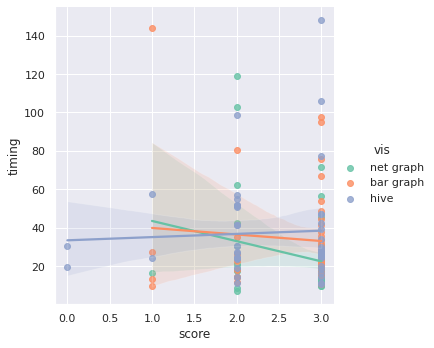

In [ ]:
print("Time completion vs Score regression")
sns.lmplot(data=df2, x="score", y="timing", hue="vis")

# **Part 2: Evaluating clusters in Agglomerative Clustering** 

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

In [ ]:
from sklearn.preprocessing import StandardScaler, normalize
X.dropna(axis=0, inplace=True)
# X.fillna(method='ffill', inplace=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the data so that the data approximately
# follows a Gaussian distribution
X_normalized = normalize(X_scaled)

    # Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)
X_normalized.columns = ["V1 score", "V1 avg timing", "V2 score", "V2 avg timing", "V3 score", "V3 avg timing","Raw score"]
V1 = X_normalized [["V1 score", "V1 avg timing"]] 
V2 = X_normalized [["V2 score", "V2 avg timing"]]
V3 = X_normalized [["V3 score", "V3 avg timing"]]
V1.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,V1 score,V1 avg timing
0,0.182996,-0.138536
1,0.318272,-0.372987
2,0.318409,-0.262305
3,0.307858,-0.301881
4,-0.312964,-0.195778


### **Dendogram**

Finding an interesting number of clusters in a dendrogram is the same as finding the largest horizontal space that doesn't have any vertical lines (the space with the longest vertical lines). This means that there's more separation between the clusters.

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [5.0, 5.0, 30.0, 30.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [17.5, 17.5, 63.75, 63.75],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [102.5, 102.5, 132.5, 132.5],
  [40.625, 40.625, 117.5, 117.5],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [180.0, 180.0, 200.0, 200.0],
  [160.0, 160.0, 190.0, 190.0],
  [79.0625, 79.0625, 175.0, 175.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [275.0, 275.0, 285.0, 285.0],
  [295.0, 295.0, 305.0, 305.0],
  [280.0, 280.0, 300.0, 300.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [290.0, 290.0, 322.5, 322.5],
  [252.5, 252.5, 306.25, 306.25],
  [222.5, 222.5, 279.375

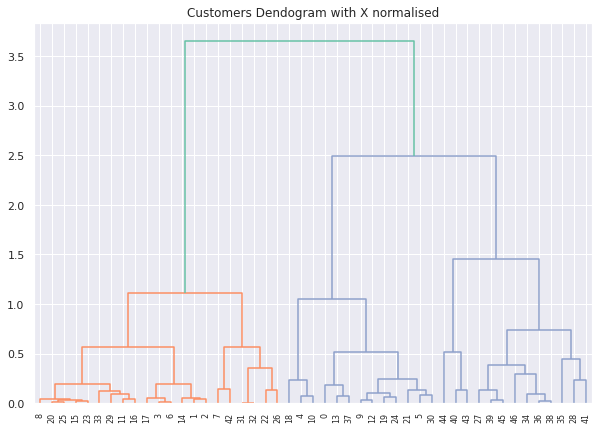

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendogram with X normalised")
clusters = shc.linkage(V3, method='ward', metric="euclidean")
shc.dendrogram(clusters)
#plt.axhline(y = 3.5, color = 'r', linestyle = '-')

### **Evaluation using diferent coeficients**

Calculating Silouette coefficient, Calinski-Harabasz Index and Davies-Bouldin Index with different *k* values.

**Silouette coefficient:** closer to 1, the better

**Calinski-Harabasz Index:** the higher the better

**Davies-Bouldin Index:** the smaller (closer to 0) the better

In [ ]:
se = [] 
sil_scores = []
calinski_score = []
davies_score = []
index = range(2, 10)
for i in index:
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward', compute_distances=True)
    labels = cluster.fit_predict(V3)
    # se.append(cluster.distances_)
    sil_scores.append(silhouette_score(V3, labels))
    calinski_score.append(calinski_harabasz_score(V3, labels))
    davies_score.append(davies_bouldin_score(V3, labels))

    # print('With in sum of squared error (WCSS) at K =', i, ':', cluster.distances_)
    print("cluster: "+str(i))
    print("Silhouette Coefficient: %0.3f" % silhouette_score(V3, labels)) #closer to 1, the better
    print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(V3, labels)) # the higher the better
    print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(V3, labels)) #should be small
    print("---------------------------------------------------------------")

cluster: 2
Silhouette Coefficient: 0.488
Calinski-Harabasz Index: 44.961
Davies-Bouldin Index: 0.794
---------------------------------------------------------------
cluster: 3
Silhouette Coefficient: 0.538
Calinski-Harabasz Index: 59.971
Davies-Bouldin Index: 0.718
---------------------------------------------------------------
cluster: 4
Silhouette Coefficient: 0.545
Calinski-Harabasz Index: 61.522
Davies-Bouldin Index: 0.638
---------------------------------------------------------------
cluster: 5
Silhouette Coefficient: 0.493
Calinski-Harabasz Index: 63.209
Davies-Bouldin Index: 0.734
---------------------------------------------------------------
cluster: 6
Silhouette Coefficient: 0.513
Calinski-Harabasz Index: 72.817
Davies-Bouldin Index: 0.633
---------------------------------------------------------------
cluster: 7
Silhouette Coefficient: 0.509
Calinski-Harabasz Index: 75.741
Davies-Bouldin Index: 0.714
---------------------------------------------------------------
cluster: 8

In [ ]:
# wrapper to use yellowbrick cluster library
class AgglomerativeClusteringWrapper(AgglomerativeClustering):
    def predict(self,X):
      return self.labels_.astype(int)

In [ ]:
#from yellowbrick.cluster import SilhouetteVisualizer
#fig, ax = plt.subplots(2, 2, figsize=(15,8))
#for i in [2, 3, 4, 5, 6]:
#  q, mod = divmod(i, 2)
#  km = AgglomerativeClusteringWrapper(n_clusters=i, affinity='euclidean', linkage='ward')
  #km.fit(X)
#  visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
#  visualizer.fit(X_normalized)

From the **Silhouette** visualisation, k=2 and k=5 are the best options due to their value being closer to 1.

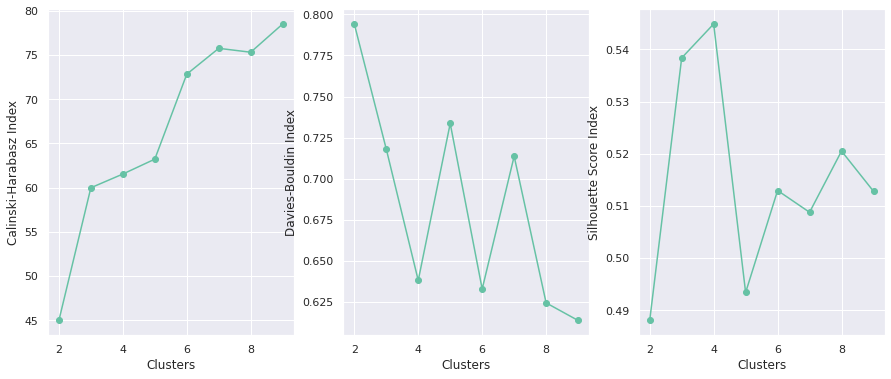

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

ax[0].plot(index, calinski_score, marker='o')
ax[0].set_xlabel('Clusters')
ax[0].set_ylabel('Calinski-Harabasz Index')

ax[1].plot(index, davies_score, marker='o')
ax[1].set_xlabel('Clusters')
ax[1].set_ylabel('Davies-Bouldin Index')

ax[2].plot(index, sil_scores, marker='o')
ax[2].set_xlabel('Clusters')
ax[2].set_ylabel('Silhouette Score Index')

plt.show()

According to **Calinski-Harabasz Index**, an elbow is formed in **K=2**. The highest number indicates a model with a high variance ratio criterion. 

According to **Davies-Bouldin Index**, an elbow is formed in **K=3**. A value near zero indicates a better partition.

According to **Silhouette Score**, the highest value is at **K=2**. A higher score means that clusters are dense and well separated.

https://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness


### **Building final model**

In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward', compute_distances=True)
labels = cluster.fit_predict(V1)

print("Silhouette Coefficient: %0.3f" % silhouette_score(V1, labels)) #closer to 1, the better
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(V1, labels)) #the higher the better
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(V1, labels)) #should be small

Silhouette Coefficient: 0.656
Calinski-Harabasz Index: 90.208
Davies-Bouldin Index: 0.618


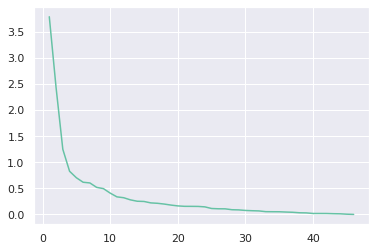

In [ ]:
sns.lineplot(x=[i for i in range(len(cluster.distances_),0,-1)], y=cluster.distances_)

In [ ]:
X_normalized['V1-clusters'] = labels
X['V1-clusters']=labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X.head()

,V1 score,V1 avg timing,V2 score,V2 avg timing,V3 score,V3 avg timing,Raw score,V1-clusters,V2-clusters,V3-clusters
0,3.0,15.211667,1.0,9.594000,2.0,11.364000,6.0,1,1,2
1,3.0,9.402667,2.0,14.059333,3.0,18.571667,8.0,1,1,0
2,3.0,14.277000,2.0,11.713000,3.0,16.521333,8.0,1,1,0
3,3.0,12.081667,3.0,19.195333,3.0,11.334667,9.0,1,0,0
4,2.0,7.125667,3.0,21.739667,0.0,19.405667,5.0,2,0,2


In [ ]:
# data.head()

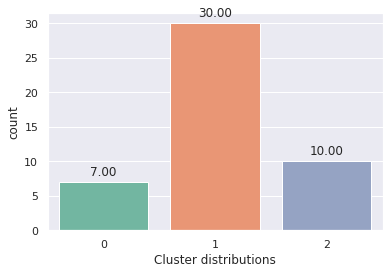

In [ ]:
splot = sns.countplot(data=X,x='V1-clusters')
plt.xlabel('Cluster distributions')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

In [ ]:
X.to_csv("/content/drive/MyDrive/Datasets/vis-literacy/cluster-results.csv")

# **Part 3: Clustering behaviour**

### **Pre-processing**

In [ ]:
# read CSV
df_X=pd.read_csv('/content/drive/MyDrive/Datasets/vis-literacy/cluster-results.csv')
df_X = df_X[["V1 score", "V1 avg timing", "V2 score", "V2 avg timing", "V3 score", "V3 avg timing", "Raw score", "V1-clusters", "V2-clusters", "V3-clusters"]]
df_X.head()

,V1 score,V1 avg timing,V2 score,V2 avg timing,V3 score,V3 avg timing,Raw score,V1-clusters,V2-clusters,V3-clusters
0,3.0,15.211667,1.0,9.594000,2.0,11.364000,6.0,1,1,2
1,3.0,9.402667,2.0,14.059333,3.0,18.571667,8.0,1,1,0
2,3.0,14.277000,2.0,11.713000,3.0,16.521333,8.0,1,1,0
3,3.0,12.081667,3.0,19.195333,3.0,11.334667,9.0,1,0,0
4,2.0,7.125667,3.0,21.739667,0.0,19.405667,5.0,2,0,2


In [ ]:
X_high = df_X[df_X['V1-clusters'] == 0]
X_high.head()

,V1 score,V1 avg timing,V2 score,V2 avg timing,V3 score,V3 avg timing,Raw score,V1-clusters,V2-clusters,V3-clusters
29,3.0,45.464000,3.0,15.441000,3.0,29.951333,9.0,0,0,0
30,3.0,56.279667,3.0,21.032667,2.0,19.023000,8.0,0,0,2
38,2.0,42.602333,3.0,44.285667,2.0,50.865333,7.0,0,0,1
39,3.0,71.682667,1.0,13.202000,2.0,51.859000,6.0,0,1,1
44,2.0,62.421000,3.0,94.864000,3.0,77.399667,8.0,0,2,3


In [ ]:
X_low = df_X[df_X['labels'] == 1]
X_low.head()

,V1 score,V1 avg timing,V2 score,V2 avg timing,V3 score,V3 avg timing,Raw score,labels
0,3.0,15.211667,1.0,9.594000,2.0,11.364000,6.0,1
4,2.0,7.125667,3.0,21.739667,0.0,19.405667,5.0,1
6,2.0,18.848667,3.0,22.302000,3.0,10.840000,8.0,1
7,1.0,16.193000,2.0,14.087000,3.0,27.903000,6.0,1
10,3.0,15.132000,2.0,22.611000,1.0,24.140000,6.0,1


In [ ]:
# read CSV
# I created this transformation of the original dataset to make the visualisations and analysis easier. 
#Instead of having columns per version, everything now is in one column and makes reference to the type of vis.
df3 = pd.read_csv('/content/drive/MyDrive/Datasets/vis-literacy/data_clusters_melt.csv')
df3 = df3[["score", "avg timing", "Vis", "labels"]]
df3.head()

,score,avg timing,Vis,labels
0,3,15.211667,net graph,1
1,3,9.402667,net graph,0
2,3,14.277000,net graph,0
3,3,12.081667,net graph,0
4,2,7.125667,net graph,1


In [ ]:

df3["labels"] = df3["labels"].replace(0,"High")
df3["labels"] = df3["labels"].replace(1,"Low")
df3.head()

,score,avg timing,Vis,labels
0,3,15.211667,net graph,Low
1,3,9.402667,net graph,High
2,3,14.277000,net graph,High
3,3,12.081667,net graph,High
4,2,7.125667,net graph,Low


### **Descriptive Statistics**

In [ ]:
print("Descriptive Statistics for Low literacy students")
X_low.describe()

Descriptive Statistics for Low literacy students


,V1 score,V1 avg timing,V2 score,V2 avg timing,V3 score,V3 avg timing,Raw score,labels
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.0
mean,2.347826,32.209884,2.391304,43.488638,2.043478,46.592739,6.782609,1.0
std,0.572768,30.365893,0.782718,34.586875,0.877924,33.888528,1.085295,0.0
min,1.000000,7.125667,1.000000,9.594000,0.000000,10.840000,5.000000,1.0
25%,2.000000,15.026000,2.000000,20.757583,2.000000,24.113500,6.000000,1.0
50%,2.000000,18.848667,3.000000,26.343000,2.000000,41.421333,7.000000,1.0
75%,3.000000,36.453500,3.000000,60.274500,3.000000,54.579167,8.000000,1.0
max,3.000000,119.091000,3.000000,143.858333,3.000000,148.020333,9.000000,1.0


In [ ]:
print("Descriptive Statistics for Low literacy students")
X_high.describe()

Descriptive Statistics for Low literacy students


,V1 score,V1 avg timing,V2 score,V2 avg timing,V3 score,V3 avg timing,Raw score,labels
count,24.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.0
mean,3.0,19.680375,2.916667,25.296965,2.708333,28.579389,8.625000,0.0
std,0.0,7.740281,0.282330,8.035182,0.464306,10.691909,0.494535,0.0
min,3.0,9.397000,2.000000,10.714667,2.000000,11.334667,8.000000,0.0
25%,3.0,14.516250,3.000000,20.362458,2.000000,24.059167,8.000000,0.0
50%,3.0,18.519667,3.000000,26.079500,3.000000,26.567167,9.000000,0.0
75%,3.0,23.517917,3.000000,29.536083,3.000000,30.922750,9.000000,0.0
max,3.0,45.464000,3.000000,41.311000,3.000000,55.122667,9.000000,0.0


### **Clusters distribution**

In [ ]:
#a single index
summary = pd.pivot_table(data=df_X,index=['V1-clusters'],values=['V1 avg timing','V1 score'],aggfunc=[np.mean, np.std, min, max, 'count'])
summary

mean                     std                     min  \
            V1 avg timing  V1 score V1 avg timing  V1 score V1 avg timing   
V1-clusters                                                                 
0               71.489524  2.428571     29.089093  0.534522     42.602333   
1               18.006767  3.000000      5.484734  0.000000      9.397000   
2               17.252667  1.900000      6.607359  0.316228      7.125667   

                               max                  count           
            V1 score V1 avg timing V1 score V1 avg timing V1 score  
V1-clusters                                                         
0                2.0    119.091000      3.0             7        7  
1                3.0     31.009333      3.0            30       30  
2                1.0     30.304667      2.0            10       10

**Group 0** - High Visual literacy group, score means are higher and average timings are lower.

**Group 1** - Low Visual literacy group, score means are lower and average timings are higher.

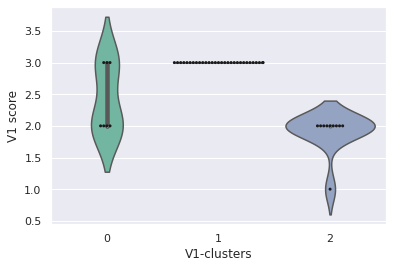

In [ ]:
#sns.heatmap(X[X['labels'] == 0].corr())
g = sns.violinplot(data=df_X, x="V1-clusters", y="V1 score")
sns.swarmplot(data=df_X, x="V1-clusters", y="V1 score", color="k", size=3)

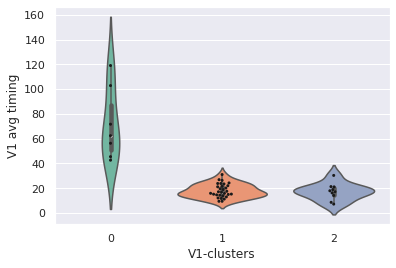

In [ ]:
#sns.heatmap(X[X['labels'] == 0].corr())
g = sns.violinplot(data=df_X, x="V1-clusters", y="V1 avg timing")
sns.swarmplot(data=df_X, x="V1-clusters", y="V1 avg timing", color="k", size=3)

In [ ]:
f, axs = plt.subplots(2,3)
g1 = sns.boxplot(data=df_X, x="labels", y="V1 score", ax=axs[0][0])
sns.swarmplot(data=df_X, x="labels", y="V1 score", color="k", size=3, ax=axs[0][0])

g2 = sns.boxplot(data=df_X, x="labels", y="V2 score", ax=axs[0][1])
sns.swarmplot(data=df_X, x="labels", y="V2 score", color="k", size=3, ax=axs[0][1])

g3 = sns.boxplot(data=df_X, x="labels", y="V3 score", ax=axs[0][2])
sns.swarmplot(data=df_X, x="labels", y="V3 score", color="k", size=3, ax=axs[0][2])

g4 = sns.boxplot(data=df_X, x="labels", y="V1 avg timing", ax=axs[1][0])
sns.swarmplot(data=df_X, x="labels", y="V1 avg timing", color="k", size=3, ax=axs[1][0])

g5 = sns.boxplot(data=df_X, x="labels", y="V2 avg timing", ax=axs[1][1])
sns.swarmplot(data=df_X, x="labels", y="V2 avg timing", color="k", size=3, ax=axs[1][1])

g6 = sns.boxplot(data=df_X, x="labels", y="V3 avg timing", ax=axs[1][2])
sns.swarmplot(data=df_X, x="labels", y="V3 avg timing", color="k", size=3, ax=axs[1][2])

f.tight_layout()

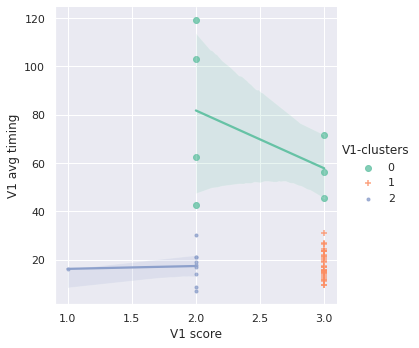

In [ ]:
sns.lmplot(x='V1 score',y='V1 avg timing',data=df_X,hue='V1-clusters',markers=['o','+','.'])

In [ ]:
sns.lmplot(x='V2 score',y='V2 avg timing',data=df_X,hue='labels',markers=['o','+'])

In [ ]:
sns.lmplot(x='V3 score',y='V3 avg timing',data=df_X,hue='labels',markers=['o','+'])

### **Visual Exploration**

In [ ]:
print("Time completion vs Score regression")
sns.lmplot(data=df3, x="V1 avg timing", y="V1 score", hue="labels")

Time completion vs Score regression


NameError: ignored

Time completion vs Score regression


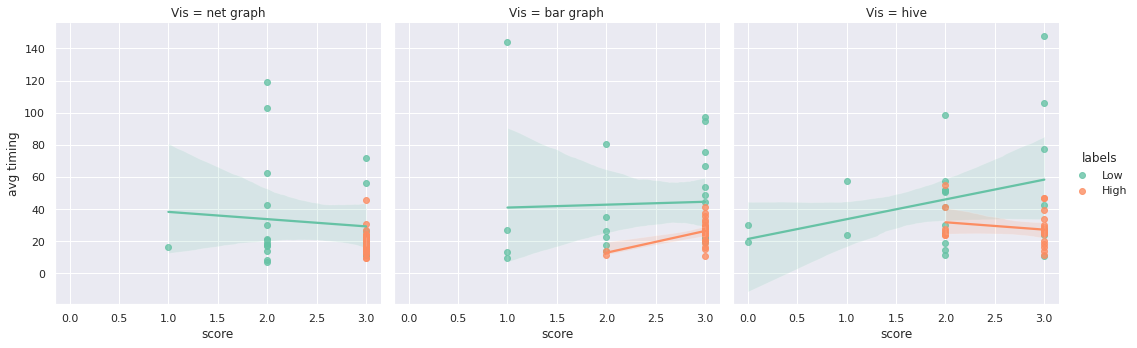

In [ ]:
print("Time completion vs Score regression")
sns.lmplot(data=df3, x="score", y="avg timing", col='Vis', hue="labels")

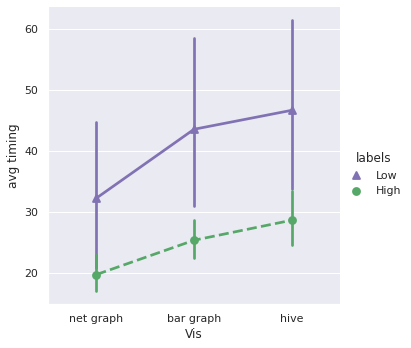

In [ ]:
sns.catplot(
    data=df3, x="Vis", y="avg timing", hue="labels",
    palette={"High": "g", "Low": "m"},
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point"
)

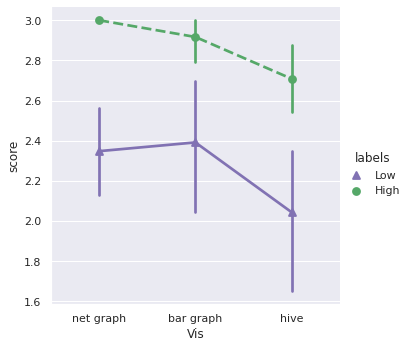

In [ ]:
sns.catplot(
    data=df3, x="Vis", y="score", hue="labels",
    palette={"High": "g", "Low": "m"},
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point"
)

# **Part 4: Perceptions on easiness, helpfulness, accuracy and trust**

### **Scales:**
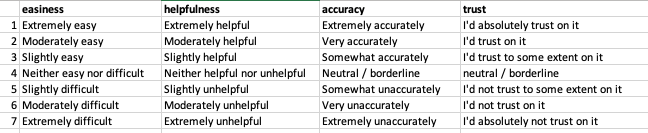

In [ ]:
#this is the part with responses to likert scales (perceptions of students)
df=pd.read_csv('/content/drive/MyDrive/Datasets/vis-literacy/survey_responses_numbered.csv')
ratings = df[["complexity", "accuracy", "helpfulness", "trust", "vis"]]
ratings.head()

,complexity,accuracy,helpfulness,trust,vis
0,2,7,1,2,net graph
1,2,2,1,2,net graph
2,2,2,2,2,net graph
3,1,2,1,2,net graph
4,1,2,1,2,net graph


In [ ]:
from scipy.stats import shapiro
shapiro(df[["complexity", "accuracy", "helpfulness", "trust"]])

ShapiroResult(statistic=0.8105700016021729, pvalue=3.4029258036270817e-25)

In [ ]:
#df[df['vis'] == "net graph"].filter(items=['complexity'])

In [ ]:
from scipy import stats
#perform Friedman Test
stats.friedmanchisquare(df[df['vis'] == "net graph"].filter(items=['complexity']), df[df['vis'] == "bar graph"].filter(items=['complexity']),df[df['vis'] == "hive"].filter(items=['complexity']))

FriedmanchisquareResult(statistic=-61.19743841346899, pvalue=1.0)

A Friedman test was run to determine if there were differences in the perceived easiness for the three visualisations. Time completion was not statistically  significant for the three visualisations, χ2(2) = -61.1974, p = 1.0

In [ ]:
from scipy import stats
#perform Friedman Test
stats.friedmanchisquare(df[df['vis'] == "net graph"].filter(items=['accuracy']), df[df['vis'] == "bar graph"].filter(items=['accuracy']),df[df['vis'] == "hive"].filter(items=['accuracy']))

FriedmanchisquareResult(statistic=-120.8400870001673, pvalue=1.0)

In [ ]:
from scipy import stats
#perform Friedman Test
stats.friedmanchisquare(df[df['vis'] == "net graph"].filter(items=['helpfulness']), df[df['vis'] == "bar graph"].filter(items=['helpfulness']),df[df['vis'] == "hive"].filter(items=['helpfulness']))

FriedmanchisquareResult(statistic=-77.02094409884408, pvalue=1.0)

In [ ]:
from scipy import stats
#perform Friedman Test
stats.friedmanchisquare(df[df['vis'] == "net graph"].filter(items=['trust']), df[df['vis'] == "bar graph"].filter(items=['trust']),df[df['vis'] == "hive"].filter(items=['trust']))

FriedmanchisquareResult(statistic=-71.69418849744052, pvalue=1.0)